<a href="https://colab.research.google.com/github/alanmejiaa/Datos-Masivos/blob/main/Tarea%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 | Predicción de diabetes en personas

El objetivo principal de esta tarea es desarrollar un modelo predictivo preciso y confiable que permita estimar si un paciente tiene o no diabetes con algunos otros factores con el uso de Deep Learning.

Buscamos saber cual de estas variables son las que mas afectan al resultado si un paciente tiene o no diabetes.
En caso de encontrar las variables que mas afectan a la variable final de decisión podríamos saber con anticipación cuando un paciente es mas propenso a sufrir de diabetes, debemos recordar que por más rápido se atienda un paciente con posible diabetes, tiene mayor probabilidad de poder tener resultados favorables.

## Análisis Exploratorio de los Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from matplotlib import pyplot
from numpy import array
from numpy import append
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [ ]:
df = pd.read_csv("diabetes.csv")
tabla1 = df.head(10)
print(tabla1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   2

In [ ]:
tabla1_lx = tabulate(tabla1, headers='keys', tablefmt='latex')

print(tabla1_lx)

\begin{tabular}{rrrrrrrrrr}
\hline
    &   Pregnancies &   Glucose &   BloodPressure &   SkinThickness &   Insulin &   BMI &   DiabetesPedigreeFunction &   Age &   Outcome \\
\hline
  0 &             6 &       148 &              72 &              35 &         0 &  33.6 &                       0.63 &    50 &         1 \\
  1 &             1 &        85 &              66 &              29 &         0 &  26.6 &                       0.35 &    31 &         0 \\
  2 &             8 &       183 &              64 &               0 &         0 &  23.3 &                       0.67 &    32 &         1 \\
  3 &             1 &        89 &              66 &              23 &        94 &  28.1 &                       0.17 &    21 &         0 \\
  4 &             0 &       137 &              40 &              35 &       168 &  43.1 &                       2.29 &    33 &         1 \\
  5 &             5 &       116 &              74 &               0 &         0 &  25.6 &                       0.2  &

In [ ]:
df.shape #Dimension

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.472396,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331242,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


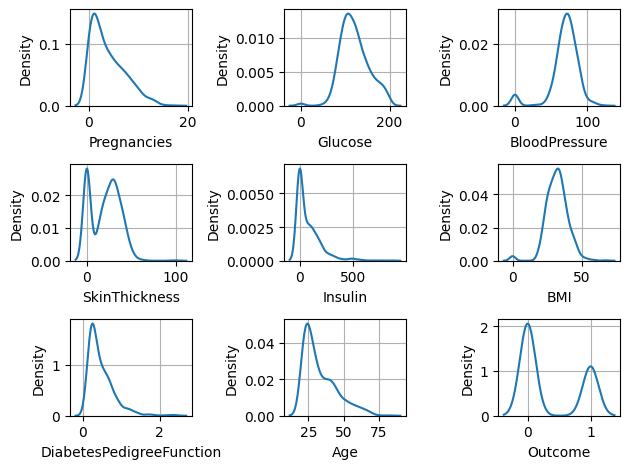

In [ ]:
r=3
c=3
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.kdeplot(x = df.loc[:,i], data = df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()


El gráfico de densidad nos permitirá visualizar cómo se distribuyen las edades en cada categoría de "Outcome" y si hay alguna diferencia en la distribución de edades entre las personas con resultado positivo (1) y resultado negativo (0) para la diabetes. Si las densidades tienen formas diferentes o se superponen de manera distinta, podría indicar una relación entre la edad y la variable objetivo.
Observamos que:
* La edad esta concentrada en los 25 años.
* El numero de embarazos esta concentrado al inicio de la gráfico, esto en relación que si se concentro en personas de 25 años, es altamente probable que no hayan estado embarazadas, o solo una vez.


In [ ]:
matriz_correlacion = df.corr()

In [ ]:
matriz_correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033542,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.136990,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041965,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.184587,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185387,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.141157,0.036242,0.292695
DiabetesPedigreeFunction,-0.033542,0.136990,0.041965,0.184587,0.185387,0.141157,1.000000,0.033823,0.173781
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033823,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173781,0.238356,1.000000


In [ ]:
from tabulate import tabulate

In [ ]:
tabla_latex = tabulate(matriz_correlacion, headers='keys', tablefmt='latex')

print(tabla_latex)

\begin{tabular}{lrrrrrrrrr}
\hline
                          &   Pregnancies &   Glucose &   BloodPressure &   SkinThickness &    Insulin &       BMI &   DiabetesPedigreeFunction &        Age &   Outcome \\
\hline
 Pregnancies              &     1         & 0.129459  &       0.141282  &      -0.0816718 & -0.0735346 & 0.0176831 &                 -0.0335422 &  0.544341  & 0.221898  \\
 Glucose                  &     0.129459  & 1         &       0.15259   &       0.0573279 &  0.331357  & 0.221071  &                  0.13699   &  0.263514  & 0.466581  \\
 BloodPressure            &     0.141282  & 0.15259   &       1         &       0.207371  &  0.0889334 & 0.281805  &                  0.0419649 &  0.239528  & 0.0650684 \\
 SkinThickness            &    -0.0816718 & 0.0573279 &       0.207371  &       1         &  0.436783  & 0.392573  &                  0.184587  & -0.11397   & 0.0747522 \\
 Insulin                  &    -0.0735346 & 0.331357  &       0.0889334 &       0.436783  &  1    

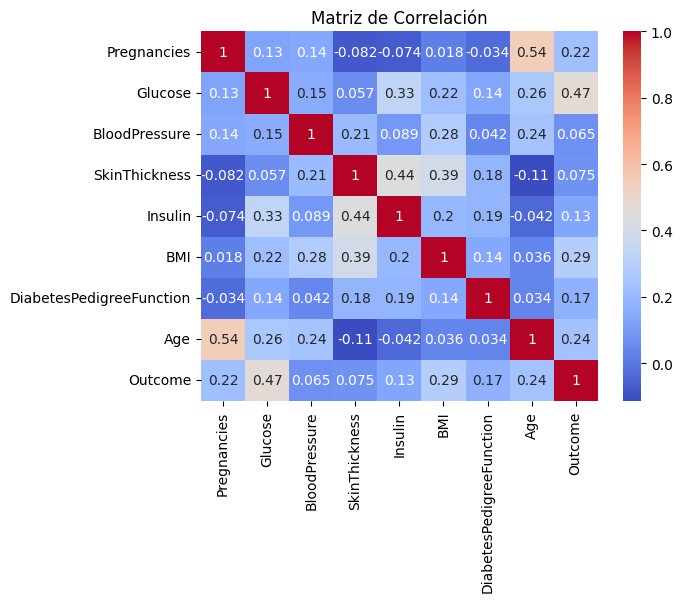

In [ ]:
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Correlaciones positivas significativas:
*	"Glucose" tiene una correlación positiva significativa con "Outcome" (0.466), "BMI" (0.221), "Age" (0.264) y "Insulin" (0.331).
*	"BMI" tiene una correlación positiva significativa con "Outcome" (0.293), "Glucose" (0.221) y "SkinThickness" (0.393).
*	"Insulin" tiene una correlación positiva significativa con "SkinThickness" (0.437) y "Glucose" (0.331).
*	"Age" tiene una correlación positiva significativa con "Pregnancies" (0.544) y "Outcome" (0.238).
*	"Outcome" tiene una correlación positiva significativa con "Glucose" (0.467), "BMI" (0.293), "Age" (0.238) y "Insulin" (0.131).
*	"SkinThickness" tiene una correlación positiva significativa con "Insulin" (0.437) y "BMI" (0.393).

Correlaciones negativas significativas:
*	"Pregnancies" tiene una correlación negativa significativa con "SkinThickness" (-0.082).
*	"SkinThickness" tiene una correlación negativa significativa con "Pregnancies" (-0.082).
*	"DiabetesPedigreeFunction" tiene correlaciones débiles y cercanas a cero con todas las demás variables.
Correlaciones cercanas a cero:
*	"DiabetesPedigreeFunction" tiene correlaciones cercanas a cero con todas las variables.
*	"BloodPressure" tiene correlaciones relativamente bajas con las demás variables


<Axes: xlabel='Age', ylabel='Pregnancies'>

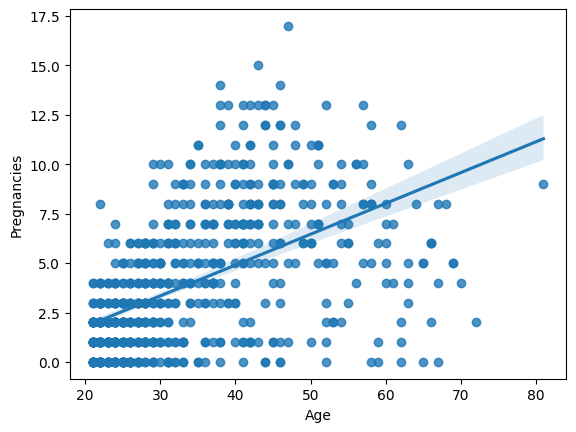

In [ ]:
sns.regplot(x = df['Age'], y = df['Pregnancies'], data = df)

Observamos como cuando la edad es menor la concentracion de embarazos esta concentrada en lo mas bajo, aun cuando la edad incrementa en el eje de los x, siempre nos encontramos personas con 0 embarazos.

# Predicción con Redes Neuronales y KERAS

In [ ]:
# Visualización Previa de la diabetes
diabetes = pd.read_csv("diabetes.csv")

In [ ]:
serieP=array([10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23])
print(serieP)

[10 25 23 14 25 23 14 85 14 36 10 25 23 14 25 23 14 85 14 36 10 25 23 14
 25 23 14 85 14 36 10 25 23 14 25 23]


In [ ]:
def DescomponerSerie(serie,longitud):
    global X, y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final > len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)

In [ ]:
DescomponerSerie(serieP,12)

(array([[10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14],
        [14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36],
        [36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10],
        [10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 1

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23


In [ ]:
# Separación de datos para descomposición de serie
y = df['Outcome']

In [ ]:
serieinf=list(y)
print(serieinf)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 

In [ ]:
DescomponerSerie(serieinf,12)

(array([[1, 0, 1, ..., 1, 0, 1],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 1, ..., 1, 0, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 1]]),
 array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1] 0
[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0] 1
[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1] 1
[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1] 1
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1] 1
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1] 1
[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 0
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0] 1
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1] 0
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0] 0
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0] 1
[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1] 1
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1] 1
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1] 1
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] 1
[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1] 0
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0] 0
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0] 0
[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0] 0
[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0] 1
[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1] 0
[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0] 0
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0] 0
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0] 0
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0] 0
[1, 1, 0, 0, 0, 0, 1, 0, 

In [ ]:
# definimos el modelo SGD
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=12)) #20 capas, funcion rectified linear unit, 12 entradas
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy']) #SGD = Stochastic Gradient Descent

In [ ]:
#TRAIN THE MODEL
model.fit(X, y, epochs=768, batch_size=9)

Epoch 1/768
84/84 [==============================] - 0s 4ms/step - loss: 0.1951 - accuracy: 0.6984
Epoch 2/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.6971
Epoch 3/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.6971
Epoch 4/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.6997
Epoch 5/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.7011
Epoch 6/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.6971
Epoch 7/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.6971
Epoch 8/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.7011
Epoch 9/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.7037
Epoch 10/768
84/84 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.7077
Epoch 11/

In [ ]:
#PREDICCIONES`
predictions = model.predict(X)
print("predictions shape:", predictions)

24/24 [==============================] - 0s 1ms/step
predictions shape: [[ 3.06603074e-01]
 [ 8.10277939e-01]
 [ 1.03187025e+00]
 [ 1.03785181e+00]
 [ 6.85722053e-01]
 [ 6.43559873e-01]
 [ 2.41551414e-01]
 [ 4.35407162e-01]
 [ 6.06252104e-02]
 [ 2.55733252e-01]
 [ 8.86704624e-01]
 [-5.31810373e-02]
 [ 4.05386984e-01]
 [ 1.04192638e+00]
 [ 2.79498935e-01]
 [ 4.59699035e-01]
 [ 5.51682830e-01]
 [ 3.07680964e-01]
 [ 4.77212667e-01]
 [ 5.21302104e-01]
 [ 4.46973801e-01]
 [ 5.68269342e-02]
 [ 5.00694752e-01]
 [ 6.71514332e-01]
 [-9.52456892e-03]
 [ 5.45865178e-01]
 [ 6.97028875e-01]
 [ 6.81236029e-01]
 [ 5.00222594e-02]
 [ 3.69209886e-01]
 [ 4.72325385e-01]
 [ 5.26080430e-01]
 [ 3.02638113e-01]
 [ 8.64310622e-01]
 [ 4.26040441e-02]
 [ 3.92509282e-01]
 [ 3.34329426e-01]
 [ 5.82706094e-01]
 [ 4.75424170e-01]
 [ 1.68043837e-01]
 [ 5.70135266e-02]
 [ 6.27180457e-01]
 [ 3.92085850e-01]
 [ 1.28562108e-01]
 [ 8.29807162e-01]
 [ 1.53585762e-01]
 [ 3.65139246e-01]
 [ 2.01402679e-01]
 [ 4.02848005e-0

In [ ]:
Predictions=pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,0.306603
1,0.810278
2,1.031870
3,1.037852
4,0.685722


In [ ]:
Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,0
1,1
2,1
3,1
4,1


In [ ]:
RealPredictions=pd.concat([Predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predictions,Real
0,0.306603,0
1,0.810278,1
2,1.031870,1
3,1.037852,1
4,0.685722,1


<Axes: >

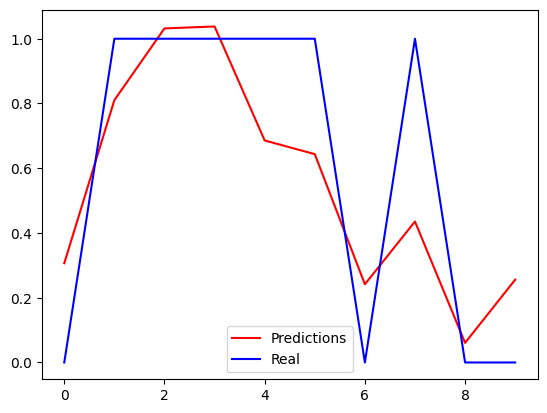

In [ ]:
RealPredictions.iloc[:10].plot(y=['Predictions', 'Real'], color=['red', 'blue'])

Solo graficamos 10 registros, para mejor visibilidad

In [ ]:
# definimos el modelo ADAM
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=12)) #20 capas, funcion rectified linear unit, 12 entradas
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='ADAM', metrics=['accuracy'])

In [ ]:
#TRAIN THE MODEL
model.fit(X, y, epochs=768, batch_size=9)

Epoch 1/768
84/84 [==============================] - 3s 7ms/step - loss: 0.2869 - accuracy: 0.5899
Epoch 2/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.6098
Epoch 3/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.6283
Epoch 4/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.6349
Epoch 5/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.6442
Epoch 6/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.6230
Epoch 7/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.6455
Epoch 8/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.6508
Epoch 9/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.6468
Epoch 10/768
84/84 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.6468
Epoch 11/

In [ ]:
#PREDICCIONES2
predictions2 = model.predict(X)
print("predictions shape:", predictions)

24/24 [==============================] - 0s 2ms/step
predictions shape: [[ 3.06603074e-01]
 [ 8.10277939e-01]
 [ 1.03187025e+00]
 [ 1.03785181e+00]
 [ 6.85722053e-01]
 [ 6.43559873e-01]
 [ 2.41551414e-01]
 [ 4.35407162e-01]
 [ 6.06252104e-02]
 [ 2.55733252e-01]
 [ 8.86704624e-01]
 [-5.31810373e-02]
 [ 4.05386984e-01]
 [ 1.04192638e+00]
 [ 2.79498935e-01]
 [ 4.59699035e-01]
 [ 5.51682830e-01]
 [ 3.07680964e-01]
 [ 4.77212667e-01]
 [ 5.21302104e-01]
 [ 4.46973801e-01]
 [ 5.68269342e-02]
 [ 5.00694752e-01]
 [ 6.71514332e-01]
 [-9.52456892e-03]
 [ 5.45865178e-01]
 [ 6.97028875e-01]
 [ 6.81236029e-01]
 [ 5.00222594e-02]
 [ 3.69209886e-01]
 [ 4.72325385e-01]
 [ 5.26080430e-01]
 [ 3.02638113e-01]
 [ 8.64310622e-01]
 [ 4.26040441e-02]
 [ 3.92509282e-01]
 [ 3.34329426e-01]
 [ 5.82706094e-01]
 [ 4.75424170e-01]
 [ 1.68043837e-01]
 [ 5.70135266e-02]
 [ 6.27180457e-01]
 [ 3.92085850e-01]
 [ 1.28562108e-01]
 [ 8.29807162e-01]
 [ 1.53585762e-01]
 [ 3.65139246e-01]
 [ 2.01402679e-01]
 [ 4.02848005e-0

In [ ]:
Predictions2=pd.DataFrame(predictions2)
Predictions2.columns = ["Predictions"]
Predictions2.head()

,Predictions
0,0.086406
1,0.739835
2,1.065562
3,0.717508
4,0.498937


In [ ]:
Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,0
1,1
2,1
3,1
4,1


In [ ]:
RealPredictions2=pd.concat([Predictions2,Real],axis=1)
RealPredictions2=pd.DataFrame(RealPredictions2)
RealPredictions2.head()

,Predictions,Real
0,0.086406,0
1,0.739835,1
2,1.065562,1
3,0.717508,1
4,0.498937,1


<Axes: >

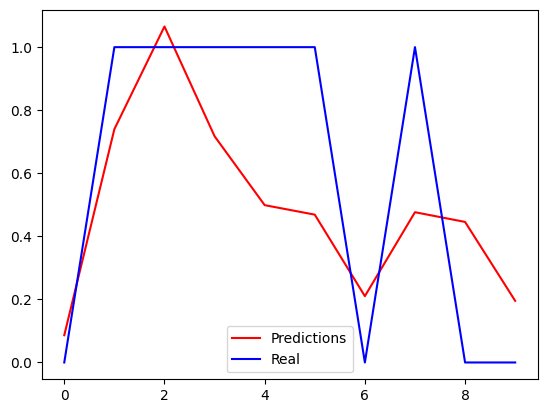

In [ ]:
RealPredictions2.iloc[:10].plot(y=['Predictions', 'Real'], color=['red', 'blue'])

In [ ]:
# demonstrate prediction
x_input = array([0.079,0.081,0.086,0.086,0.084,0.07,0.078,0.079,0.076,0.068,0.062, 0.058])
x_input = x_input.reshape((1, 12))
x_input

array([[0.079, 0.081, 0.086, 0.086, 0.084, 0.07 , 0.078, 0.079, 0.076,
        0.068, 0.062, 0.058]])

In [ ]:
valores_nuevos=[]
for i in range(12):
    # Predecir el siguiente valor basado en los datos iniciales
    siguiente_valor = model.predict(np.reshape(x_input,(1,12)))

    # Agregar el siguiente valor a los datos iniciales para la siguiente iteración
    x_input = np.append(x_input, siguiente_valor)
    x_input = x_input[1:]  # Descartar el primer valor para mantener solo los últimos 12

    # Guardarlos un arreglo
    valores_nuevos.append(siguiente_valor)

1/1 [==============================] - 0s 25ms/step


In [ ]:
valores_nuevos = np.array(valores_nuevos)
print(valores_nuevos)

[[[ 0.43997267]]

 [[ 0.12958452]]

 [[-0.1274497 ]]

 [[ 0.21548161]]

 [[ 0.48562965]]

 [[ 0.15273562]]

 [[ 0.05164298]]

 [[ 0.16757241]]

 [[ 0.07729825]]

 [[ 0.06702909]]

 [[ 0.52426636]]

 [[ 0.28928033]]]


#Conclusiones

Observamos que ninguno de los modelos se ajusta correctamente debido a que todas las variables están afectando en la predicción del modelo, la variable Outcome es binomial por lo que puede no ser muy preciso, nos hubiera gustado tener más datos y tener la variable de respuesta de alguna otra manera y ver las nuevas predicciones. Si logramos tener una predicción más acertada podríamos lograr un avance en la medicina para la prevención de diabetes y lograr que menos personas contraigan esta enfermedad y que también muchas otras puedan prevenirla a temprana edad. Lo visto por las primeras pruebas con la correlación de las variables fue como lo esperamos, teniendo variables que se relacionaban entre si y algunas que no tenían nada de relación entre ellas.
Se podria usar otra variable como la Glucosa y asi predecir el nivel de glucosa en las personas, podriamos tener una estimacion mas exacta al no ser un valor binomial, esto tambien podria servir para alguna prevencion, si una persona no se hace estudios, el lograr saber el nivel de glucosa que puede llegar a tener con los otros datos, y esto tambien podria venir a ayudar a la prevencion de diabetes, ya que como vimos en la matriz de correlacion, la variable Outcome (diabetes) y la variable de glucosa estan positivamente correlacionadas entre si.